In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [22]:
Ixx, Iyy, Izz = 0.0635, 0.0635, 0.0102
B = 4.5e-5
omega = math.pi/6
alpha_x, alpha_y, alpha_z = 1.2e-4, 1.2e-4, 8.8e-4

def theta(t, omega, alpha):
    return omega*t - 0.5*alpha*t**2

def theta_dot(t, omega, alpha):
    return omega - alpha*t

def model1(t, Kxx, Kzz):
    return theta_dot(t, omega, alpha_y) * (np.cos(theta(t, omega, alpha_y))**2 * (Kxx - Kzz) + np.sin(theta(t, omega, alpha_y))**2 * (Kzz - Kxx))

def model2(t, Kzz, Kyy):
    return theta_dot(t, omega, alpha_x) * (np.cos(theta(t, omega, alpha_x))**2 * (Kzz - Kyy) + np.sin(theta(t, omega, alpha_x))**2 * (Kyy - Kzz))

def model3(t, Kyy, Kxx):
    return theta_dot(t, omega, alpha_z) * (np.cos(theta(t, omega, alpha_z))**2 * (Kyy - Kxx) + np.sin(theta(t, omega, alpha_z))**2 * (Kxx - Kyy))

value1 = -2* alpha_y * Iyy / B**2
value2 = -2 * alpha_x * Ixx / B**2
value3 = -2 * alpha_z * Izz / B**2

In [23]:
# Generate an array of 43200 values for 43200 seconds
time = np.linspace(0, 43200, 43200)

# Generate an array of identical values for each of the 43200 seconds
set1 = np.full(43200, value1)
set2 = np.full(43200, value2)
set3 = np.full(43200, value3)

First K: 1e-05 +- 1077331824692164.2
Second K: 1e-05 +- 1077331824692147.2


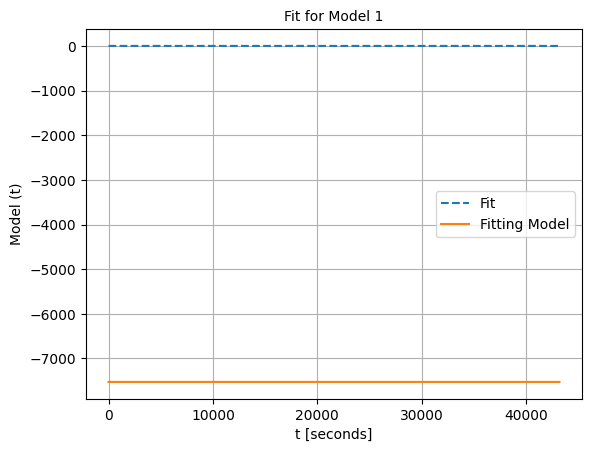

In [41]:
xdata, ydata = np.array(time), np.array(set1)           # specify model

initialguess = [1e-5,1e-5]

popt, pcov = curve_fit(model1, xdata, ydata, initialguess)          # specify model

print("First K:",popt[0],"+-",np.sqrt(pcov[0][0]))
print("Second K:",popt[1],"+-",np.sqrt(pcov[1][1]))

func_plot=[model1(x, popt[0], popt[1]) for x in xdata]

plt.clf()
plt.plot(xdata, func_plot, label='Fit', linestyle='--')
plt.plot(xdata, ydata, label='Fitting Model')
plt.title('Fit for Model 1', fontsize = 10)
plt.xlabel('t [seconds]', fontsize = 10)
plt.ylabel('Model (t)', fontsize = 10)
plt.grid(True)
plt.legend(loc='best')
#plt.savefig('./Figures/Model 1 Fit.pdf',dpi=100,bbox_inches='tight')
plt.show()